# クラスタリング

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline

### 【問題1】～【問題7】

In [2]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol=0, verbose=False, graph=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.graph = graph
        self.best_sse = 10**20
    
    # 【問題1】中心点の初期値を決める
    def _initial_point(self, X):
        self.myu = X[np.random.choice(len(X), size=self.n_clusters, replace=False)]
    
    # 【問題2】SSEを求める関数の作成
    def _calc_sse(self, X):
        sse = 0
        for i in range(len(X)):
            # for j in range(self.n_clusters):
            #     if j == X[i, -1]:
            #         sse += np.sum((X[i,:-1] - self.myu[j])**2)
            j = int(X[i, -1])
            sse += np.sum((X[i,:-1] - self.myu[j])**2)
        
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters
    
    # 【問題3】クラスタへの割り当て
    def _update_cluster(self, X):
        for i in range(len(X)):
            dist_m = 10**20
            
            for j in range(self.n_clusters):
                # dist = np.sqrt(np.sum((X[i,:-1] - self.myu[j])**2))
                dist = np.sum((X[i,:-1] - self.myu[j])**2)
                
                if dist < dist_m:
                    dist_m = dist
                    X[i,-1] = j
    
    # 【問題4】中心点の移動
    def _update_myu(self, X):
        current_tol = 0
        for j in range(self.n_clusters):
            center = np.mean(X[X[:,-1]==j, :-1], axis=0)
            current_tol += np.sqrt(np.sum((self.myu[j] - center)**2))
            self.myu[j] = center
        self.current_tol = current_tol
    
    # 【問題5】繰り返し, 【問題6】異なる初期値で計算
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
        
        for i in range(self.n_init):
            self._initial_point(X)
            X_cluster = np.hstack([X, np.zeros([len(X), 1])])
            
            # 散布図
            if self.graph:
                plt.figure(figsize=(4,4))
                plt.scatter(X[:, 0], X[:, 1], s=40, c='#888', marker='.')
                for k in range(self.n_clusters):
                    plt.scatter(self.myu[k, 0], self.myu[k, 1], s=80, c=color[k], marker='X')
                plt.show()
            
            for j in range(self.max_iter):
                self._calc_sse(X_cluster)
                self._update_cluster(X_cluster)
                self._update_myu(X_cluster)
                
                if self.verbose:
                    print(f'init:{i:2}  iter:{j:2}  best_SSE:{self.best_sse}')
                
                # 散布図
                if self.graph:
                    plt.figure(figsize=(4,4))
                    for k in range(self.n_clusters):
                        plt.scatter(X[X_cluster[:,-1]==k][:, 0], X[X_cluster[:,-1]==k][:, 1], s=40, c=color[k], marker='.')
                        plt.scatter(self.myu[k, 0], self.myu[k, 1], s=80, c=color[k], marker='X')
                    plt.show()
                
                if self.current_tol < self.tol:
                    break
            
            # self._calc_sse(X_cluster)
    
    # 【問題7】推定
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.record_cluster):
                dist = np.sqrt(np.sum((X[i] - self.record_myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    y_pred[i] = j
        return y_pred


In [3]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

X_train, X_valid = train_test_split(X, train_size=0.8, random_state=None)

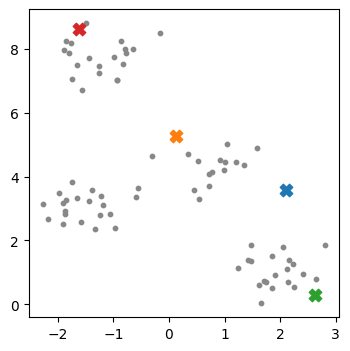

init: 0  iter: 0  best_SSE:1101.921025336598


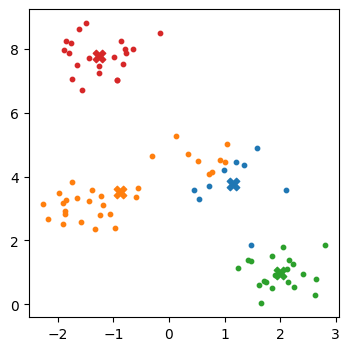

init: 0  iter: 1  best_SSE:80.40799434785846


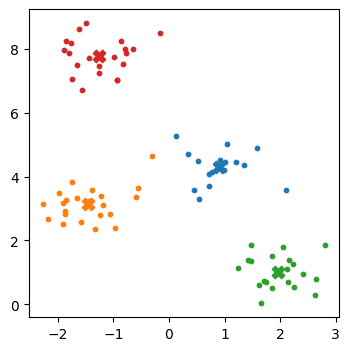

init: 0  iter: 2  best_SSE:40.04276030971897


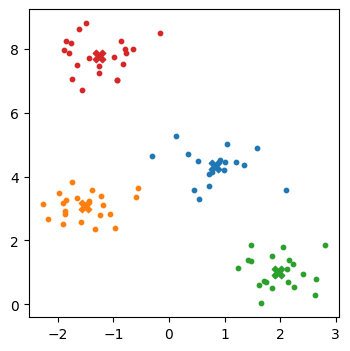

init: 0  iter: 3  best_SSE:37.78342667855658


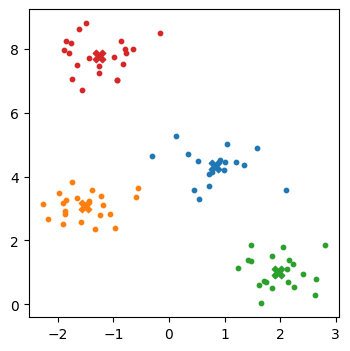

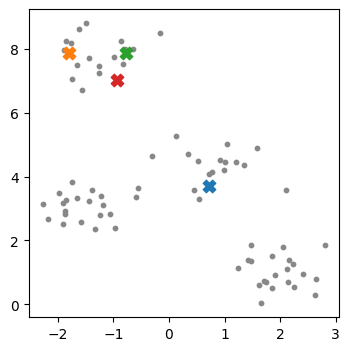

init: 1  iter: 0  best_SSE:37.78342667855658


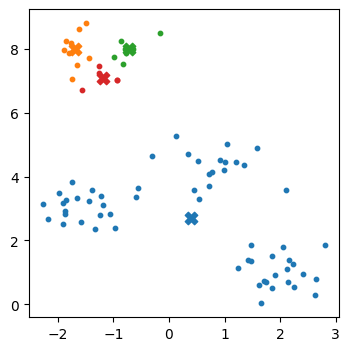

init: 1  iter: 1  best_SSE:37.78342667855658


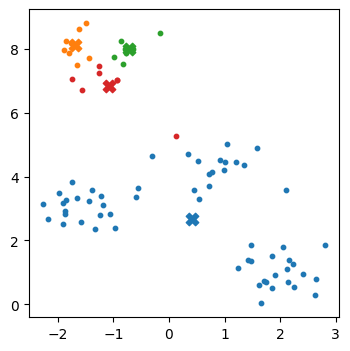

init: 1  iter: 2  best_SSE:37.78342667855658


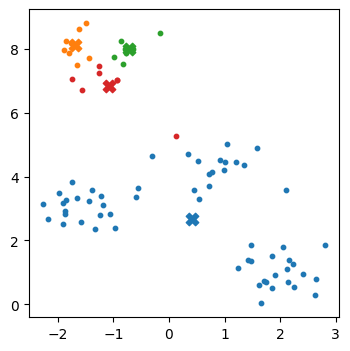

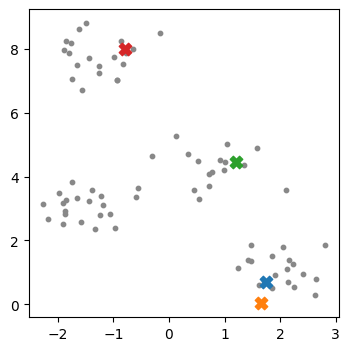

init: 2  iter: 0  best_SSE:37.78342667855658


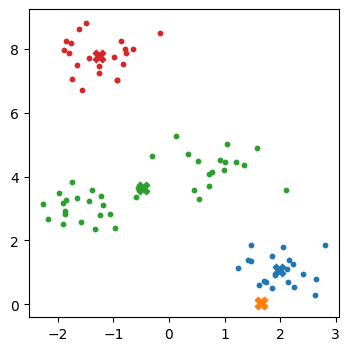

init: 2  iter: 1  best_SSE:37.78342667855658


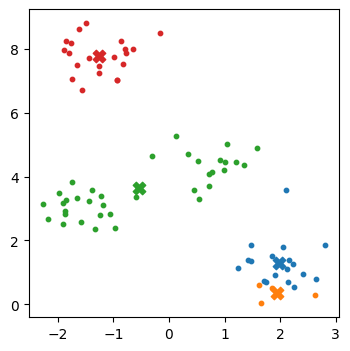

init: 2  iter: 2  best_SSE:37.78342667855658


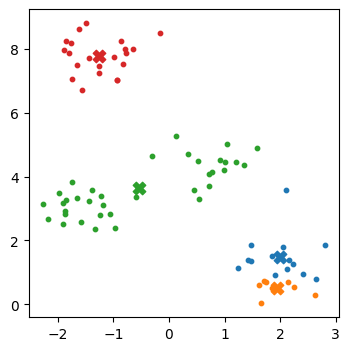

init: 2  iter: 3  best_SSE:37.78342667855658


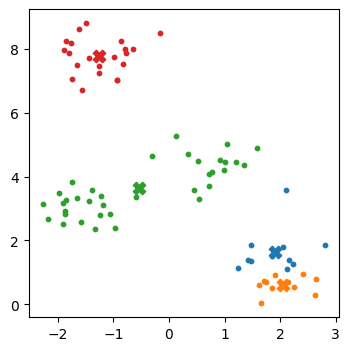

init: 2  iter: 4  best_SSE:37.78342667855658


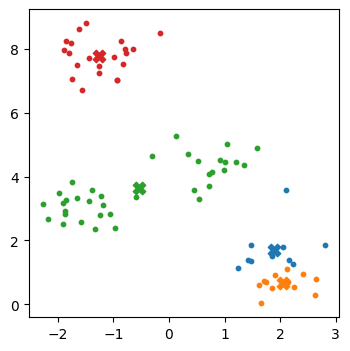

init: 2  iter: 5  best_SSE:37.78342667855658


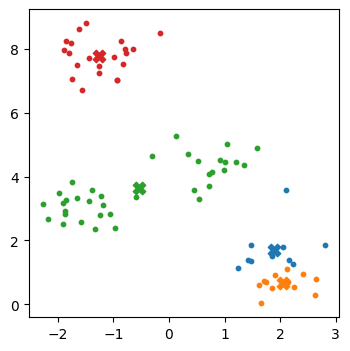

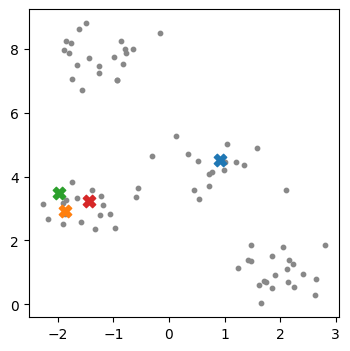

init: 3  iter: 0  best_SSE:37.78342667855658


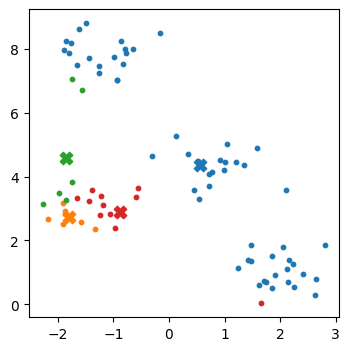

init: 3  iter: 1  best_SSE:37.78342667855658


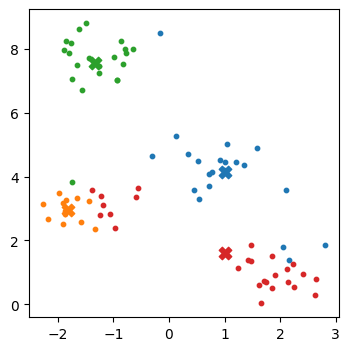

init: 3  iter: 2  best_SSE:37.78342667855658


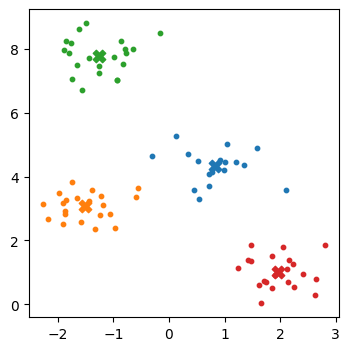

init: 3  iter: 3  best_SSE:37.78342667855658


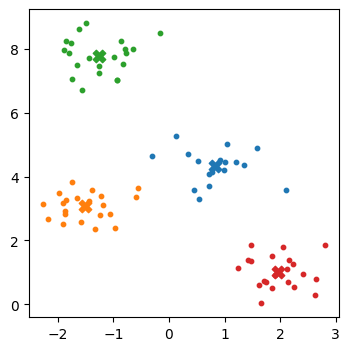

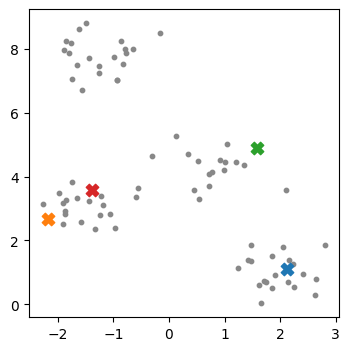

init: 4  iter: 0  best_SSE:37.78342667855658


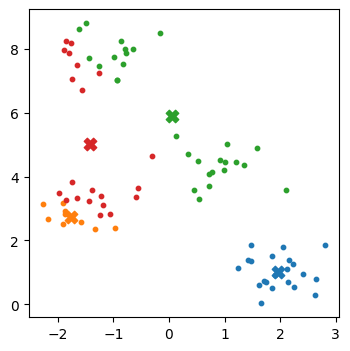

init: 4  iter: 1  best_SSE:37.78342667855658


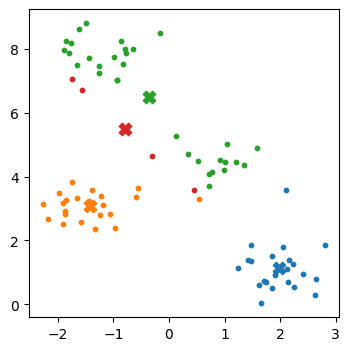

init: 4  iter: 2  best_SSE:37.78342667855658


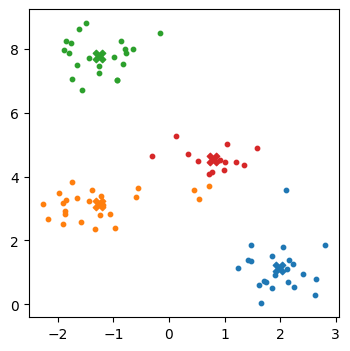

init: 4  iter: 3  best_SSE:37.78342667855658


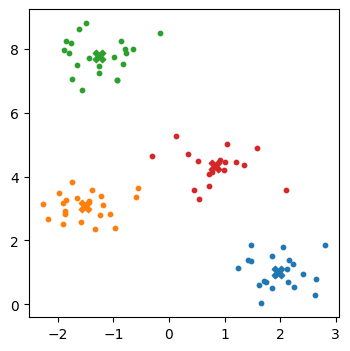

init: 4  iter: 4  best_SSE:37.78342667855658


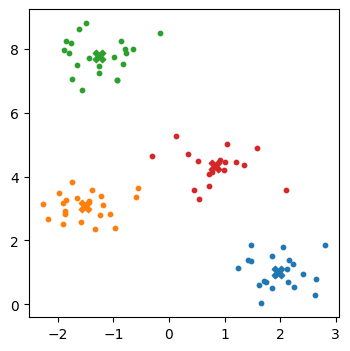

In [4]:
clf = ScratchKMeans(n_clusters=4, n_init=5, max_iter=100, tol=1e-4, verbose=True, graph=True)
clf.fit(X_train)

In [5]:
pred = clf.predict(X_valid)
pred

array([1., 3., 0., 2., 2., 3., 3., 2., 1., 3., 0., 0., 0., 0., 0., 1., 0.,
       1., 2., 0.])

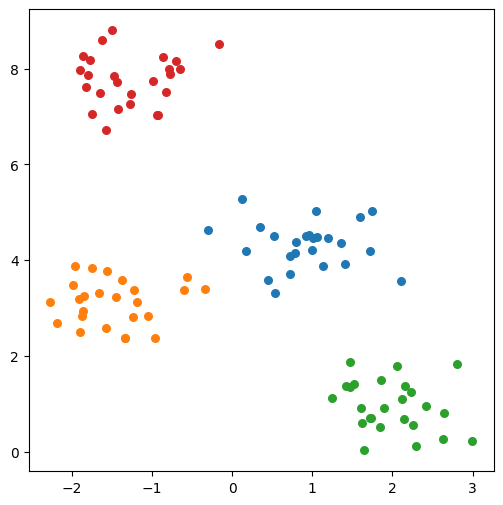

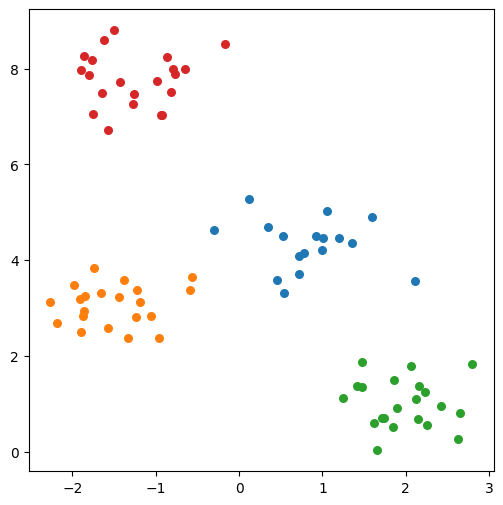

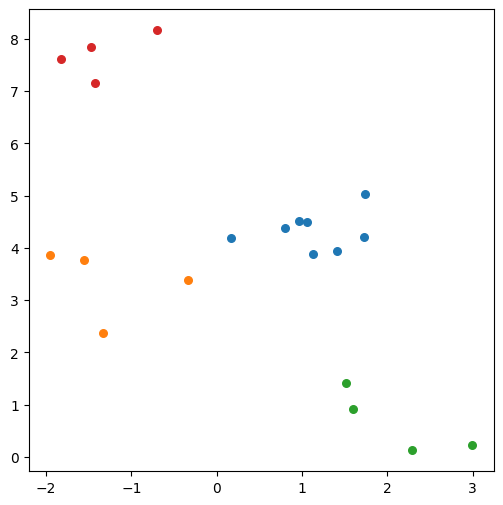

In [6]:
def scatter(X, clf):
    # color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    plt.figure(figsize=(6,6))
    pred = clf.predict(X)
    for i in range(clf.n_clusters):
        plt.scatter(X[pred==i][:, 0], X[pred==i][:, 1], s=30)
    plt.show()

scatter(X, clf)
scatter(X_train, clf)
scatter(X_valid, clf)

### 【問題8】エルボー法の実装

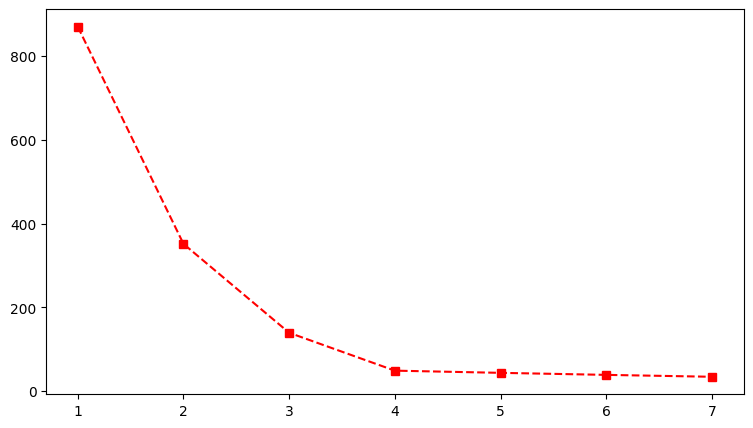

In [7]:
def elbow(data, k_max=10):
    elbow = {}
    for k in range(1, k_max+1):
        model = ScratchKMeans(n_clusters=k, n_init=5, max_iter=100, tol=1e-4, verbose=False, graph=False)
        model.fit(data)
        elbow[k] = model.best_sse

    plt.figure(figsize=(9,5))
    plt.plot(list(elbow.keys()), list(elbow.values()), 'rs--')
    plt.xticks(np.arange(1, k_max+1))
    plt.show()

elbow(X, 7)

### 【問題9】（アドバンス課題）シルエット図

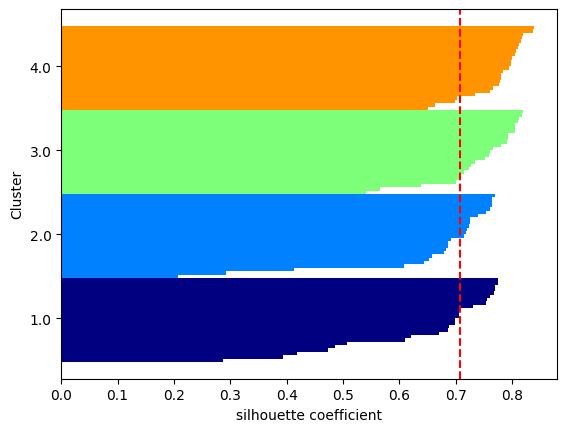

In [8]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

pred = clf.predict(X)

cluster_labels = np.unique(pred)
n_clusters = cluster_labels.shape[0]

# シルエット係数を計算
silhouette_vals = silhouette_samples(X, pred, metric='euclidean')  # ユークリッド距離でシルエット係数計算

y_ax_lower, y_ax_upper= 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[pred==c]      # cluster_labelsには 0,1,2,3 が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters)               # 色の値を作る
        plt.barh(range(y_ax_lower, y_ax_upper),           # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower + y_ax_upper) / 2)      # クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
plt.axvline(silhouette_avg, color="red", linestyle="--")  # 係数の平均値に破線を引く 
plt.yticks(yticks, cluster_labels + 1)                    # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

## クラスタ分析

In [9]:
# データ読み込み
data = pd.read_csv('Wholesale customers data.csv')
X = data[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
X.shape

(440, 6)

In [10]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(440, 2)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


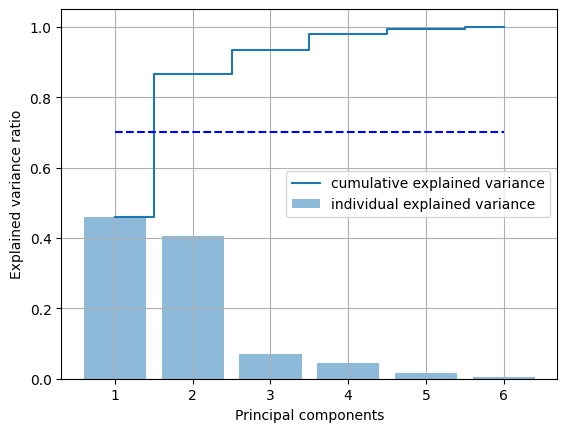

In [11]:
# PCAの分散説明率
pca = PCA(n_components=None)
pca = pca.fit(X)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 1, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

### 【問題10】クラスタ数kの選択

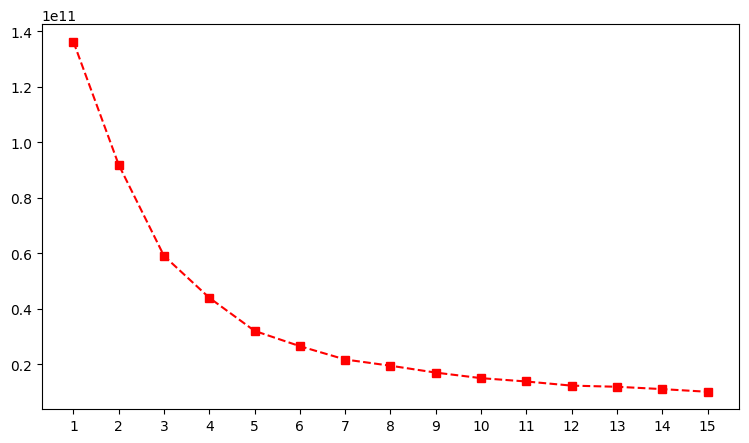

In [12]:
elbow(X_pca, k_max=15)

エルボー法を用いると、クラスタ数が3以降でSSEの減少量が少なくなるため、3をクラスタ数として選択する。

### 【問題11】既知のグループとの比較

In [13]:
k = 3
clf = ScratchKMeans(n_clusters=k, n_init=5, max_iter=100, tol=1e-4, verbose=False, graph=False)
clf.fit(X_pca)
pred = clf.predict(X_pca)
summary_df = pd.DataFrame({'pred': pred, 'Region': data['Region'], 'Channel': data['Channel']})

In [14]:
pd.pivot_table(summary_df, index='Region', columns='pred', values='Channel', aggfunc=len, margins=True)

pred,0.0,1.0,2.0,All
Region,,,,
1,56,11,10,77
2,35,4,8,47
3,238,45,33,316
All,329,60,51,440


どの Region もクラスタのデータ数の割合があまり変わらないため、Region の違いによってデータの傾向に差があるとは言えない。

In [15]:
pd.pivot_table(summary_df, index='Channel', columns='pred', values='Region', aggfunc=len, margins=True)

pred,0.0,1.0,2.0,All
Channel,,,,
1,244,52,2,298
2,85,8,49,142
All,329,60,51,440


Channel1 は pred0, pred1 の割合が高く、Channel2 は pred2 の割合が高いため、Channel の違いによってデータの傾向に差があると言える。

### 【問題12】卸売業者にとって有益な情報

In [16]:
data['cluster'] = pred

In [17]:
data.iloc[:, 2:].groupby('cluster').agg(['mean', 'max', 'min'])

Fresh                         Milk                    Grocery  \
                 mean     max    min          mean    max   min          mean   
cluster                                                                         
0.0       8249.996960   22686      3   3800.966565  18664    55   5248.556231   
1.0      35941.400000  112151  22096   6044.450000  43950   286   6288.616667   
2.0       8027.411765   44466     85  18375.921569  73498  3737  27342.549020   

                            Frozen             Detergents_Paper              \
           max    min         mean    max  min             mean    max  min   
cluster                                                                       
0.0      22272      3  2571.677812  35009   25      1755.112462  10069    3   
1.0      20170    471  6713.966667  60869  127      1039.666667   5058   10   
2.0      92780  13567  2014.313725  10155   33     12314.607843  40827  282   

          Delicassen             
                mean    max min  
cluster                          
0.0      1137.018237  14472   3  
1.0      3049.466667  47943   3  
2.0      2233.254902  16523   3

- クラスタ0：Fresh, Frozen, Delicassenが多い。Freshが特に多い。
- クラスタ1：全体的に購入数が少ない
- クラスタ2：Milk, Grocery, Detergents_Paperが高い。Detergents_Paperが特に多い。

クラスタ0はFresh、クラスタ2はDetergents_Paperの購入数が特に多いため、それらのコストを抑えるような施策が望ましい。